In [80]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import re

def parse_microbenchmark_log(wnum, lib, mode, density):
    time_array = []
    with open(f"../benchmark/100G-results/{str(wnum)}/{lib}-{mode}/{str(density)}.log", "r", encoding='UTF-8') as f:
        lines = [line for line in f]
    for line in lines:
        line = line.strip()
        x = re.search("time:(.*);", line)
        if x is not None:
            batch_time = float(x.group(1))
            time_array.append(batch_time)
    return np.array(time_array)/1000

def parse_blockfusion_microbenchmark_log(wnum, lib, mode, density, block_size, message_size):
    time_array = []
    with open(f"../benchmark/100G-results/{str(wnum)}/{lib}-{mode}/{str(density)}-{str(block_size)}-{str(message_size)}.log", "r", encoding='UTF-8') as f:
        lines = [line for line in f]
    for line in lines:
        line = line.strip()
        x = re.search("time:(.*);", line)
        if x is not None:
            batch_time = float(x.group(1))
            time_array.append(batch_time)
    return np.array(time_array)/1000

# Figure 4

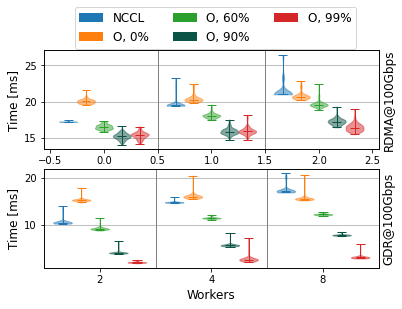

In [69]:
colors =  ['#1f77b4', '#ff7f0e','#2ca02c', '#0b5345','#d62728','#9467bd',  '#8c564b']
wnums = [2, 4, 8]
legend = ['NCCL', \
          'O, 0%', \
          'O, 60%', \
          'O, 90%', \
          'O, 99%'
          ]
#densities = [1.0, 0.8, 0.4, 0.2, 0.1, 0.08, 0.04, 0.02, 0.01]
densities = [1.0, 0.4, 0.1, 0.01]
patches = [mpatches.Patch(label=label) for label in legend]
fig, (ax,ax1) = plt.subplots(2,1)
fig.set_size_inches(6,4)
# plot RDMA
data_all = []
data = []
for w in wnums:
    data.append(parse_microbenchmark_log(w, 'NCCL', 'RDMA', 1.0))
data_all.append(data)
for d in densities:
    data = []
    for w in wnums:
        data.append(parse_microbenchmark_log(w, 'omnireduce', 'RDMA', d))
    data_all.append(data)
    
num_columns = len(wnums)
ax.yaxis.grid(True, which='major', zorder=1)
for p in np.arange(num_columns-1):
    ax.axvline(x=p+0.5, color='gray', linewidth=1)
plt.xlim(-0.5, num_columns-0.5)

num_plots = len(data_all)

for i in range(num_plots):
    pos = np.arange(len(data_all[i])) -0.5 + ((i+1)/(num_plots+1))
    violin_parts = ax.violinplot(data_all[i], showmeans=False, showmedians=True, widths=1/(num_plots+1),
                                     positions=pos, showextrema=True)
    for partname in ('cbars','cmins','cmaxes','cmedians'):
        vp = violin_parts[partname]
        vp.set_linewidth(1)
        vp.set_facecolor(colors[i])
        vp.set_edgecolor(colors[i])
    for pc in violin_parts['bodies']:
        pc.set_alpha(0.5)
        pc.set_zorder(2)
        pc.set_facecolor(colors[i])
        pc.set_edgecolor(colors[i])
    patches[i].set_fc(violin_parts['bodies'][0].get_facecolor()[0][0:3])
    
# plot GDR
data_all = []
data = []
for w in wnums:
    data.append(parse_microbenchmark_log(w, 'NCCL', 'GDR', 1.0))
data_all.append(data)
for d in densities:
    data = []
    for w in wnums:
        data.append(parse_microbenchmark_log(w, 'omnireduce', 'GDR', d))
    data_all.append(data)
    
num_columns = len(wnums)
ax1.yaxis.grid(True, which='major', zorder=1)
for p in np.arange(num_columns-1):
    ax1.axvline(x=p+0.5, color='gray', linewidth=1)
plt.xlim(-0.5, num_columns-0.5)

num_plots = len(data_all)

for i in range(num_plots):
    pos = np.arange(len(data_all[i])) -0.5 + ((i+1)/(num_plots+1))
    violin_parts = ax1.violinplot(data_all[i], showmeans=False, showmedians=True, widths=1/(num_plots+1),
                                     positions=pos, showextrema=True)
    for partname in ('cbars','cmins','cmaxes','cmedians'):
        vp = violin_parts[partname]
        vp.set_linewidth(1)
        vp.set_facecolor(colors[i])
        vp.set_edgecolor(colors[i])
    for pc in violin_parts['bodies']:
        pc.set_alpha(0.5)
        pc.set_zorder(2)
        pc.set_facecolor(colors[i])
        pc.set_edgecolor(colors[i])
    patches[i].set_fc(violin_parts['bodies'][0].get_facecolor()[0][0:3])

ax.set_ylabel('Time [ms]', fontsize=12)
ax00 = ax.twinx()
ax00.tick_params(axis='y', right=False, labelright=False)
ax00.set_ylabel("RDMA@100Gbps", fontsize=12)
ax1.set_ylabel('Time [ms]', fontsize=12)
ax11 = ax1.twinx()
ax11.tick_params(axis='y', right=False, labelright=False)
ax11.set_ylabel("GDR@100Gbps", fontsize=12)
ax1.set_xlabel('Workers', fontsize=12)    
plt.setp(ax1, xticks=[y for y in range(num_columns)],
     xticklabels=[str(pow(2,l+1)) for l in range(num_columns)])
art = [plt.legend(handles=patches, loc=1, bbox_to_anchor=(0.95, 2.7), ncol=3, fontsize=12)]

# Figure 5

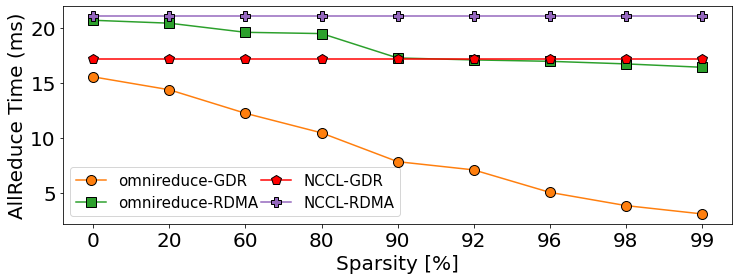

In [78]:
densities = [1.0, 0.8, 0.4, 0.2, 0.1, 0.08, 0.04, 0.02, 0.01]
x = ['0', '20', '60', '80', '90', '92', '96', '98', '99']
libs = ['omnireduce', 'NCCL']
modes = ['GDR', 'RDMA']
colors = ['#ff7f0e', '#2ca02c', 'red', '#9467bd']
markers = ["o", "s", "p", "P"]
fig, ax = plt.subplots()
fig.set_size_inches(12,4)
FONT_SIZE = 20
i=0
for l in libs:
    for m in modes:
        label = l+'-'+m
        data = []
        for d in densities:
            if l=='omnireduce':
                t = parse_microbenchmark_log(8, l, m, d)
            elif l=='NCCL':
                t = parse_microbenchmark_log(8, l, m, 1.0)
            data.append(np.median(t))
        ax.plot(x, data, marker=markers[i], markersize=10,  mec='k', color=colors[i], label=label)
        i=i+1
ax.tick_params(axis='both', which='major', labelsize=FONT_SIZE)
ax.legend(fontsize=15, ncol=2, columnspacing=0.2).set_zorder(1)
ax.set_ylabel('AllReduce Time (ms)', fontsize=FONT_SIZE)
ax.set_xlabel('Sparsity [%]', fontsize=FONT_SIZE)
plt.show()

# Figure 13

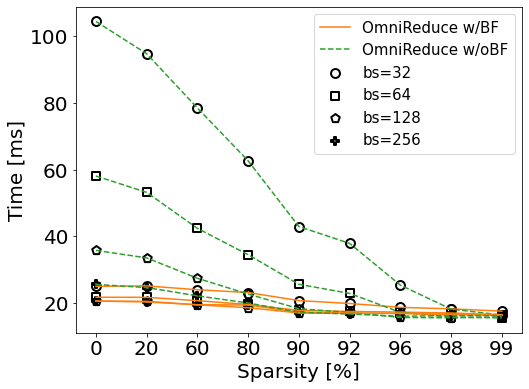

In [102]:
x = ['0', '20', '60', '80', '90', '92', '96', '98', '99']
densities = [1.0, 0.8, 0.4, 0.2, 0.1, 0.08, 0.04, 0.02, 0.01]
block_sizes = [32,64,128,256]
message_size = 1024
fig, ax = plt.subplots()
fig.set_size_inches(8,6)
FONT_SIZE = 20
bfcolors = ['#ff7f0e', '#2ca02c']
bsmarkers = ["o", "s", "p", "P", "*"]
bftypes_labels = ['OmniReduce w/BF', 'OmniReduce w/oBF']
bflinestyles = ['-', '--']
i=0
for bs in block_sizes:
    data_bf = []
    data_nbf = []
    for d in densities:
        t_bf = np.median(parse_blockfusion_microbenchmark_log(8, 'omnireduce', 'RDMA', d, bs, bs))
        t_nbf = np.median(parse_blockfusion_microbenchmark_log(8, 'omnireduce', 'RDMA', d, bs, message_size))
        data_bf.append(t_bf)
        data_nbf.append(t_nbf)
    if bs==32:
        ax.plot(x, data_nbf, color=bfcolors[0], linestyle=bflinestyles[0], label=bftypes_labels[0])
        ax.plot(x, data_bf, color=bfcolors[1], linestyle=bflinestyles[1], label=bftypes_labels[1])
    else:
        ax.plot(x, data_nbf, color=bfcolors[0], linestyle=bflinestyles[0])
        ax.plot(x, data_bf, color=bfcolors[1], linestyle=bflinestyles[1])
    ax.scatter(x, data_bf, color='w', marker=bsmarkers[i],s=80,edgecolors='k',linewidths=2, label='bs='+str(bs))
    ax.scatter(x, data_nbf, color='w', marker=bsmarkers[i],s=80,edgecolors='k',linewidths=2)
    i+=1
ax.tick_params(axis='both', which='major', labelsize=FONT_SIZE)
ax.set_ylabel('Time [ms]', fontsize=FONT_SIZE)
ax.set_xlabel('Sparsity [%]', fontsize=FONT_SIZE)
ax.legend(fontsize=15)
plt.show()